In [0]:
!pip install qiskit

## Quantum Key Distribution

Asja and Balvis are two close friends but Balvis has to go abroad soon, but they want to keep in touch. However Eve, their curious friend, wants to know what they will talk about. <br>
Asja and Balvis found a solution involving a "one-time pad". Before Balvis leaves, they randomly produce a binary string. When Asja wants to send a message,  she first $XOR$s her message bit by bit with this string, and after Belvis gets the message, he $XOR$s again with the same string. By this method Belvis is able to decode the message and read what Asja sent. <br> 
In this situation Eve, who is eavesdropping on the conversation and obtains a copy of the sent message, can't decode the message because there are too many ($2^n$ if Asja sends a $n$-bit long message)  possible strings Asja and Balvis can produce. <br>
However Asja and Balvis have to produce new keys each time they want to communicate. But Asja and Balvis can produce only a finite number of bits before Balvis leaves, so they will run out of unused bits sooner or later. If one uses the same key more than once, there are methods that enable Eve to gain some information about the messages.

Quantum Key Distribution solves this problem. We can use the nature of quantum information to generate new keys even when Asja and Balvis are far from each other. <br>

There are several protocols for QKD. We will see BB84, developed by [Charles Bennett and Gilles Brassard](https://researcher.watson.ibm.com/researcher/files/us-bennetc/BB84highest.pdf).

## Distributing the Key 

One day Asja misses Balvis, so they decide to generate a new key to talk securely. <br>
Asja will be sending quantum bits instead of classical bits at the beginning of the key production process. <br>
## Bell basis

Our classical computational basis states are $ \lvert 0 \rangle $ and $ \lvert 1 \rangle $ . If we apply a Hadamard gate to these states, we obtain  $ \frac{ \lvert 0 \rangle + \lvert 1 \rangle }{\sqrt{2}}$ and  $ \frac{ \lvert 0 \rangle - \lvert 1 \rangle }{\sqrt{2}}$, respectively. Note that these two new states are orthogonal as well. We can use any two orthogonal  states as basis. So these two states will form a new basis that is called the Bell basis. If we think of $ \lvert 0 \rangle $ and $ \lvert 1 \rangle $ as $\uparrow$ and $\rightarrow$, respectively, then the Bell basis states can be abbreviated as $\nearrow$ and $\searrow$.

Asja will be sending a sequence of randomly produces "0" or "1"s. She will not be using the computational basis for all those values. She will decide whether to use the computational basis or the Bell basis for each of those bits randomly. So she will be sending a random sequence consisting of $\uparrow$, $\rightarrow$, $\nearrow$ and $\searrow$s. And she will not be telling what basis she will use for each bit to Balvis beforehand. <br>

Measurements in the computational basis always yield $ \lvert 0 \rangle $ or $ \lvert 1 \rangle $ (or, according to our new notation, $\uparrow$ or $\rightarrow$).  <br>
Every time Balvis receives a qubit from Asja, he randomly decides which basis to use to measure this state. If he decides to measure in the Bell basis, he just applies a Hadamard gate to the qubit and then measures it in the computational basis. You can see that this procedure converts  $\nearrow$ and $\searrow$ to $\uparrow$ and $\rightarrow$, respectively. <br>



What if Balvis chooses the wrong basis for a particular qubit? Let us say that Asja sends a $\nearrow$, and Balvis uses the computational basis ($\uparrow$ and $\rightarrow$) for the measurement. $\nearrow$ is  $ \frac{ \lvert 0 \rangle + \lvert 1 \rangle }{\sqrt{2}}$, so if we measure this state in the computational basis, we will see $ \lvert 0 \rangle $ or $ \lvert 1 \rangle $ with probabillty $(\frac{1}{\sqrt{2}})^2$ each. Verify that Balvis will get random results with probability $\frac{1}{2}$ in all other cases where he has picked the wrong basis.

When there is no eavesdropping, the BB84 protocol works as follows: <br>
* Asja creates quantum states randomly in either of the four cases,  $\uparrow$, $\rightarrow$, $\nearrow$ or $\searrow$, and sends them to Balvis. She records the bits and the bases that she used.
* Balvis measures all these states by randomly deciding on a basis for each of them.
* If he chooses the wrong basis then he gets a random result for that bit, otherwise, he gets same bit that Asja sent.

After this process, Asja and Balvis talk openly, using classical bits, about which basis choices they happened to agree on.


* They discard the bits which got measured using the wrong basis.
* The remaining qubits are same on both Asja and Balvis. So they have a common key. <br>

But what happens if Eve listens to the channel? <br>

There are a few important assumptions. First, our quantum channel is error-free. Second, we use authenticated classical channels for everything but qubits. <br> 

## Quantum No Cloning Theorem

The no-cloning theorem states that it is impossible to create an identical copy of an arbitrary unknown quantum state. So Eve can't make copies of qubits and make measurements after protocol ends. <br>

Any measurement Eve does has impact on quantum states. <br>

Assume that Eve measures the quantum states (in bases that she selects on her own), and sends the values she observes in new qubits in the same basis that she used to Balvis. (Intercept and resend attack) <br>

After this point we use Qiskit to simulate the protocol.


### Task 1

Let's see how Eve effects a qubit which she measures in the wrong basis. For instance, consider a bit with value 0 for which Asja and Balvis both pick the Bell basis, and Eve uses the computational basis.

* (The no-Eve case) Apply two sequential Hadamard gates to a qubit, and measure
* (When Eve measures and sends what she has seen) Apply a Hadamard gate, measure, and then apply another Hadamard, and measure again.

Let us apply two successive Hadamard gates, and measure. 

In [0]:
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit, execute, Aer
import numpy as np
import random

qreg = QuantumRegister(1)
creg = ClassicalRegister(1)
circ = QuantumCircuit(qreg,creg)

circ.h(qreg[0])

circ.h(qreg[0])

circ.measure(qreg, creg)


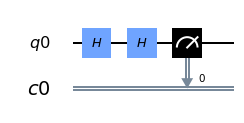

In [0]:
circ.draw(output = 'mpl')


In [0]:
job = execute(circ,Aer.get_backend('qasm_simulator'), shots=1024)
counts1 = job.result().get_counts(circ)
print(counts1)

{'0': 1024}


We observe $0$ all time. Let's now consider the second case by making a measurement between the two Hadamard gates as well.

In [0]:
qreg = QuantumRegister(1)
creg = ClassicalRegister(2)
circ = QuantumCircuit(qreg,creg)

circ.h(qreg[0])

circ.measure(qreg, creg[0])

circ.h(qreg[0])

circ.measure(qreg, creg[1])


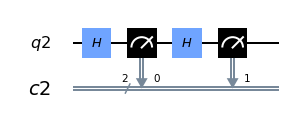

In [0]:
circ.draw(output = 'mpl')


In [0]:
job = execute(circ,Aer.get_backend('qasm_simulator'), shots=1024)
counts1 = job.result().get_counts(circ)
print(counts1)

{'00': 276, '10': 247, '11': 234, '01': 267}


Balvis sees $0$ or $1$ randomly when Eve has interfered. This will help Asja and Balvis to notice Eve.

## The BB84 Protocol

Now we will revisit the BB84 protocol. <br>

Asja will be sending a random sequence consisting of $\uparrow$, $\rightarrow$, $\nearrow$ and $\searrow$s. And she will not be telling what basis she will use for each bit to Balvis beforehand. Balvis measures all these states by randomly deciding on a basis for each of them. <br>

We will add one more step at the end of the protocol that we saw earlier. Because Eve's interference has some impacts on measurements which Balvis got, Asja and Balvis will be using some of the qubits to check for the presence of Eve. 

The BB84 protocol works as follows: <br>
* Asja creates quantum states randomly in either of the four cases,  $\uparrow$, $\rightarrow$, $\nearrow$ or $\searrow$, and sends them to Balvis. She records the bits and the bases that she used.
* Balvis measures all these states by randomly deciding on a basis for each of them.
* If he chooses the wrong basis then he should get a random result for that bit, otherwise, he should get same bit that Asja sent.

After this process, Asja and Balvis talk openly, using classical bits, about which basis choices they happened to agree on.

* They discard the bits which got measured using the wrong basis.
* They take the remaining bits and divide them to two equal size groups randomly. <br>
* They will openly compare the results of the measurements that Balvis got on each qubit in first group. If they find a conflict, they will abort the protocol.
* Bits in the second group should be same on both sides if Eve has not interfered. So they have a common secret key. <br>

Because the probabilty that Asja and Balvis use same basis for one qubit is $\frac{1}{2}$ and the protocol uses half of the bits which got measured using same basis to detect Eve, we need $4n$ qubits to get $n$-bit long key.

## Calculating the Probabilty that Asja and Balvis do not Notice Eve

Assume that Eve listens to the quantum channel between Asja and Balvis. She captures the qubits that Asja sends, makes measurements in a randomly selected basis for every qubit because she has no clue about Asja's choices, and sends that qubit on to Balvis. We will calculate the probabilty that the value of the bit which got measured by Balvis is same as Asja's initial value after Eve's interference. <br> 

Eve measured a qubit in a randomly selected basis, and initialized a new qubit with the value she just measured in same basis she just used, and will send to Balvis. If she chose the correct basis, Balvis will not notice Eve because she correctly reproduces same state. But if Eve chose wrong basis, then there are two possibilities: Asja used the $+$ basis and Eve chose $\times$, and vice versa. <br>
In first case, Eve sees a $ \lvert 0 \rangle $ or a $ \lvert 1 \rangle $ with probabilty $\frac{1}{2}$, and she will send that qubit to Balvis after applying the Hadamard gate to it, because she is using the Bell basis, and whatever Eve measured, Balvis will see $ \lvert 0 \rangle $ or $ \lvert 1 \rangle $ with probability $\frac{1}{2}$ since he will be using the other basis. Verify that Balvis will get random results with probability $\frac{1}{2}$ in the other case as well. <br>

So the probabilty of Balvis getting a bit different than the one sent by Asja if Eve is involved is $\frac{1}{2}*\frac{1}{2}=\frac{1}{4}$, the probabilty of Eve choosing the incorrect basis times probabilty of Balvis seeing the wrong bit. 
Then probabilty that Asja and Balvis will notice Eve if she listens to their communication after testing $n$ bits is $1-(\frac{3}{4})^n$ which is greater than $0.999999999$ after $n>72$.

### Implementation in Qiskit

In [0]:
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit, execute, Aer
import numpy as np
import random

# Length of message
n = 10
# Number of qubits for protocol
sz = 4*n

qreg = QuantumRegister(sz)
creg = ClassicalRegister(sz)
circ = QuantumCircuit(qreg,creg)

# flip coin to decide initial values
arr1 = np.random.randint(2, size=sz)
print("Asja's initialization")
print(arr1)

# apply x gate for 1s, do nothing for 0s
for i in range(sz):
    if arr1[i] == 1:
        circ.x(qreg[sz-i-1])
        
# flip coins to decide gates        
arr2 = np.random.randint(2, size=sz)
print("Asja's Basis")
print(arr2)
for i in range(sz):
    if arr2[i] == 1:
        circ.h(qreg[sz-i-1])

# Asja sends qubits
        
# Eve decides randomly to listen or not        
spy = np.random.randint(2)
if spy == 1:
    # becuse Eve doesn't know which base Asja use she randomly decide that
    arr3 = np.random.randint(2, size=sz)
    print("Eve listens")
    print("Eve's Basis")
    print(arr3)
    for i in range(sz):
        if arr3[i] == 1:
            circ.h(qreg[sz-i-1])
    # measure all qubits
    circ.measure(qreg, creg)
    # prepare qubits same basis as she measure and send them to Balvis
    for i in range(sz):
        if arr3[i] == 1:
            circ.h(qreg[sz-i-1])

# Belvis measures qubits with random basis    
arr4 = np.random.randint(2, size=sz)
print("Belvis' Basis")
print(arr4)
for i in range(sz):
    if arr4[i] == 1:
        circ.h(qreg[sz-i-1])

# Belvis measures
circ.measure(qreg, creg)

Asja's initialization
[1 0 1 1 0 0 0 0 0 0 0 1 1 1 1 1 0 0 0 0 0 1 0 1 1 0 0 0 0 1 1 0 1 0 0 0 0
 1 1 0]
Asja's Basis
[1 1 0 0 0 0 1 0 1 0 0 1 1 0 0 0 1 1 1 0 0 0 0 1 1 1 0 1 0 1 0 1 0 1 0 0 0
 1 1 1]
Belvis' Basis
[0 1 1 0 0 1 1 1 0 0 0 0 0 0 0 0 1 1 1 1 0 1 1 1 1 0 0 0 1 0 1 1 0 1 0 1 1
 0 1 0]


In [0]:
job = execute(circ,Aer.get_backend('qasm_simulator'), shots=1)
counts1 = job.result().get_counts(circ)
print(counts1)

{'0011000000001111000101111001100010010011': 1}


In [0]:
# because we measured just one time, we have only one possible outcome so this loop iterates only once
for result in counts1.keys():
    # how many times Asja and Balvis agree on basis
    same = 0
    # indices of qubits that they agree on basis
    indx = []
    for i in range(sz):
        if arr2[i] == arr4[i]:
            same = same + 1
            indx.append(i)
    if same < 2*n:
        print("Insufficient qubits, restart the process")
        break
    # shuffle to get random 2n qubits and n control qubits
    random.shuffle(indx)
    # let first n qubits are control bits(because we shuffle whole array first n is also random)
    cont = indx[0:n]
    # boolean flag to stop process if Eve is listening
    b = False
    for i in cont:
        if int(result[i]) != arr1[i]:
            print("Eve is caught listening!")
            b = True
            break
    # Eve is listining so stop the process
    if b:
        break
    # We can reach here if we decide Eve is not listening, check if it is true.
    if spy == 1:
        print("Eve is not caught!")
        break
    print("Key is : " + str([result[j] for j in indx[n:(2*n)]]))
    break

Key is : ['1', '1', '1', '1', '0', '0', '0', '0', '0', '0']


### Implementation with Simulaqron and CQC

Simulaqron is a simulator for quantum internet and CQC is a universal instruction set. <br>

You can install Simulaqron with pip <br>

Before running python code, please start simulaqron with "simulaqron start --nodes Asja,Balvis,Eva" (You can change name of nodes). <br>

We have three nodes Asja, Balvis and Eva as previous examples and Eva performs intercep-and-resend attack. To simuluate Eva, Asja sends qubits to Eva then Eva sends to Balvis after her operations. <br>

Asja creates qubits for $4n$ times, initializes and sends to Eva. Eva randomly measures and sends new qubits to Balvis. After that, we do same things: eliminate qubits which got measured on different basis, use half of them to detect Eva and use remaining part as key.

In [0]:
!pip install simulaqron

In [0]:
!pip install service_identity

In [0]:
!simulaqron start --nodes Asja,Balvis,Eva

In [0]:
from cqc.pythonLib import CQCConnection, qubit
import numpy as np
import random

# length of key
n = 5
# required number of qubits
sz = 4*n

asja_init = []
asja_basis = []
balvis_basis = []
balvis_measures = []

with CQCConnection("Asja") as Asja:
    # randomly choose initial values
    asja_init = list(np.random.randint(2, size=sz))
    # randomly change basis
    asja_basis = list(np.random.randint(2, size=sz))
    for i in range(sz):
        q = qubit(Asja)
        if asja_init[i] == 1:
            q.X()
        if asja_basis[i] == 1:
            q.H()
        Asja.sendQubit(q, "Eva")

with CQCConnection("Eva") as Eva:
    if random.randint(0, 1):
        print("Eva listening!")
        for i in range(sz):
            q = Eva.recvQubit()
            if random.randint(0, 1):
                q.H()
                r = q.measure()
                nq = qubit(Eva)
                if r:
                    nq.X()
                nq.H()
                Eva.sendQubit(nq, "Balvis")
            else:
                r = q.measure()
                nq = qubit(Eva)
                if r:
                    nq.X()
                Eva.sendQubit(nq, "Balvis")
    else:
        for i in range(sz):
            q = Eva.recvQubit()
            Eva.sendQubit(q, "Balvis")

with CQCConnection("Balvis") as Balvis:
    balvis_basis = list(np.random.randint(2, size=sz))
    for i in range(sz):
        q = Balvis.recvQubit()
        if balvis_basis[i] == 1:
            q.H()
        m = q.measure()
        balvis_measures.append(m)

same_indx = []

for i in range(sz):
    if asja_basis[i] == balvis_basis[i]:
        same_indx.append(i)

if len(same_indx) < 2*n:
    print("Insufficent qubits please retry")
    exit()

random.shuffle(same_indx)

same_indx = same_indx[:2*n]

for i in same_indx[:n]:
    if asja_init[i] != balvis_measures[i]:
        print("Eva is here !!!")
        exit()

print("Asja key: ", [asja_init[i] for i in same_indx[n:2*n]])
print("Balvis key: ", [balvis_measures[i] for i in same_indx[n:2*n]])


In [0]:
!simulaqron reset